/var/folders/1_/lwbyjwp1383400_lcrqg_gxw0000gn/T/ipykernel_2698/4077492976.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  irrelevant_features[f'noise_{i}'] = np.random.normal(0, 1, n_samples)
/var/folders/1_/lwbyjwp1383400_lcrqg_gxw0000gn/T/ipykernel_2698/4077492976.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  irrelevant_features[f'noise_{i}'] = np.random.normal(0, 1, n_samples)
/var/folders/1_/lwbyjwp1383400_lcrqg_gxw0000gn/T/ipykernel_2698/4077492976.py:21: PerformanceWarning: DataFrame is highly fragmented.  Thi

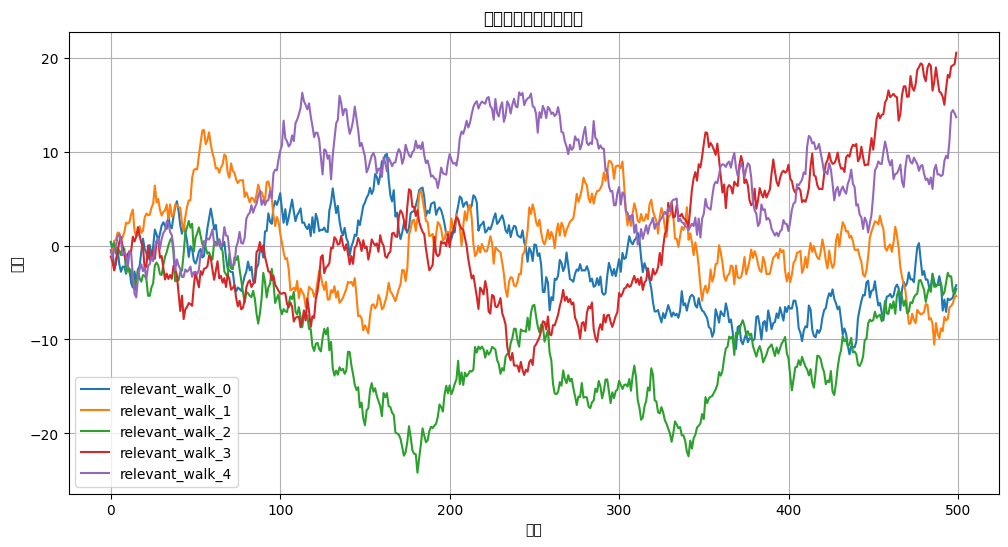

/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22768 (\N{CJK UNIFIED IDEOGRAPH-58F0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


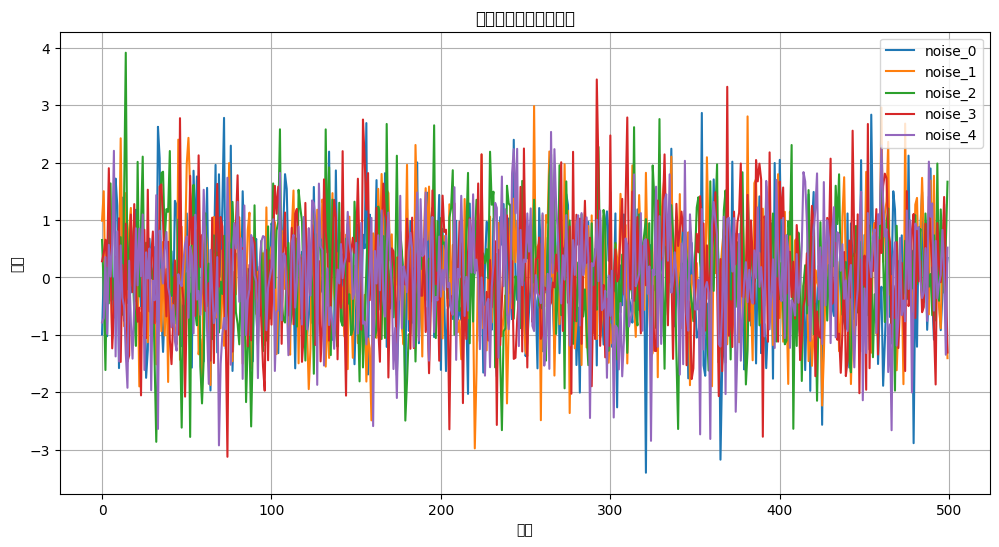

/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanjiaan/Documents/GitHub/Cat

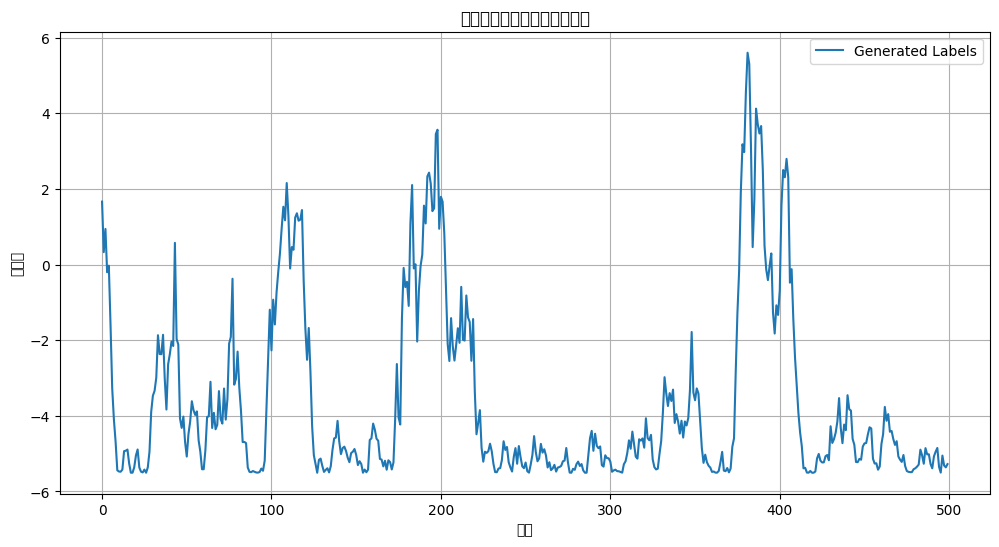

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(72)

def generate_time_series_simulation_data(n_samples=500, n_relevant=20, n_irrelevant=30):


    time = np.arange(n_samples)
    relevant_features = pd.DataFrame()
    
    for i in range(n_relevant):
        start_value = np.random.normal(0, 1)  
        increments = np.random.normal(0, 1, n_samples - 1)  
        feature = np.concatenate([[start_value], start_value + np.cumsum(increments)]) 
        relevant_features[f'relevant_walk_{i}'] = feature

    irrelevant_features = pd.DataFrame()
    for i in range(n_irrelevant):
        irrelevant_features[f'noise_{i}'] = np.random.normal(0, 1, n_samples)

    all_features = pd.concat([relevant_features, irrelevant_features], axis=1)
    all_features = all_features.sample(frac=1, axis=1).reset_index(drop=True)  

    return all_features, relevant_features.columns.tolist(), irrelevant_features.columns.tolist()

def generate_labels_for_lstm(data_df, relevant_columns, noise_level=1, link_function=lambda x: np.sin(x/100)*np.exp((x+1000)/500)
):
    num_features = len(relevant_columns)
    data_length = len(data_df)

    std_dev = 20 * np.sqrt(np.log(num_features) / data_length)
    coefficients = np.random.normal(0, std_dev, num_features)

    X_relevant = data_df[relevant_columns].values
    y = X_relevant @ coefficients + np.random.normal(0, noise_level, data_length)
    y = link_function(y)
    
    return y

data, relevant_columns, irrelevant_columns = generate_time_series_simulation_data(
    n_samples=500, n_relevant=60, n_irrelevant=140
)

y = generate_labels_for_lstm(data, relevant_columns, noise_level=1, link_function= lambda x: np.sin(x/100)*np.exp((x+1000)/500))

train_size = 400
train_data_df = data.iloc[:train_size]
train_labels = y[:train_size]
test_data_df = data.iloc[train_size:]
test_labels = y[train_size:]

plt.figure(figsize=(12, 6))
for col in relevant_columns[:5]:  
    plt.plot(data[col], label=col)
plt.title('有效特征（随机游走）')
plt.xlabel('时间')
plt.ylabel('数值')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for col in irrelevant_columns[:5]:  
    plt.plot(data[col], label=col)
plt.title('无效特征（随机噪声）')
plt.xlabel('时间')
plt.ylabel('数值')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y, label='Generated Labels')
plt.title('生成的标签（带时间依赖性）')
plt.xlabel('时间')
plt.ylabel('标签值')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
train_data_df.tail()

,noise_136,noise_54,noise_118,relevant_walk_56,noise_19,noise_125,noise_96,relevant_walk_9,noise_83,relevant_walk_35,...,relevant_walk_26,noise_133,noise_47,relevant_walk_16,relevant_walk_43,noise_129,relevant_walk_49,noise_36,noise_5,relevant_walk_15
395,0.106101,-0.879204,1.284626,-16.867438,0.772469,0.531365,-0.164050,-4.556083,0.701592,-2.376729,...,-16.922463,-0.709290,1.971048,-1.651227,-22.387800,1.781921,4.245395,-0.540655,-0.375453,-13.341348
396,0.219893,0.028933,0.319274,-17.543745,0.397461,0.600273,-1.269847,-4.371131,-0.266816,-0.812908,...,-17.834998,0.646401,-0.632006,-1.711038,-23.161709,-0.579277,4.012587,0.264648,-1.519599,-13.989962
397,0.485391,0.496373,-1.942756,-17.859271,1.706042,-0.223598,0.015620,-5.625367,-0.724118,-2.075661,...,-17.780828,0.572850,-0.259655,-1.682565,-22.685836,-0.261144,3.656764,-0.825672,0.041267,-13.916331
398,-2.055543,0.055230,-1.361483,-17.960942,0.702255,-1.334926,0.319635,-5.239292,-1.573021,-1.507315,...,-18.628628,0.436174,-1.071643,-0.655398,-23.801529,-0.218836,4.107792,-0.965270,0.805184,-13.652464
399,-0.286379,0.279470,-1.269424,-17.887929,-0.585804,-0.561664,1.185046,-6.780733,-0.347599,-1.291082,...,-19.453516,1.222884,-0.265155,-0.066566,-22.637531,0.122230,2.521165,-0.649448,0.447106,-12.781446


In [52]:
correlation_matrix = train_data_df[relevant_columns].corr()
correlation_matrix

,relevant_walk_0,relevant_walk_1,relevant_walk_2,relevant_walk_3,relevant_walk_4,relevant_walk_5,relevant_walk_6,relevant_walk_7,relevant_walk_8,relevant_walk_9,...,relevant_walk_50,relevant_walk_51,relevant_walk_52,relevant_walk_53,relevant_walk_54,relevant_walk_55,relevant_walk_56,relevant_walk_57,relevant_walk_58,relevant_walk_59
relevant_walk_0,1.000000,-0.121046,0.043788,-0.376840,0.303620,0.339089,-0.611187,-0.372061,-0.566167,0.484441,...,0.009134,-0.718224,0.034773,0.097527,-0.665990,-0.431806,0.000135,0.721932,-0.123422,0.599154
relevant_walk_1,-0.121046,1.000000,0.332431,-0.283854,-0.448998,0.116754,-0.108788,0.022328,0.150004,0.117350,...,0.293850,0.117250,0.342692,0.183120,-0.217478,-0.178020,0.420275,0.239631,0.037824,-0.012429
relevant_walk_2,0.043788,0.332431,1.000000,-0.264673,-0.404825,0.736116,0.003521,0.402674,0.103244,0.515186,...,0.666204,-0.069004,0.395170,0.765640,-0.504656,-0.382907,0.359309,0.464710,0.557695,0.567311
relevant_walk_3,-0.376840,-0.283854,-0.264673,1.000000,-0.337501,-0.175628,0.603373,0.009483,0.357638,-0.119556,...,0.235611,0.370248,-0.421054,0.090430,0.366586,0.510840,-0.504883,-0.598703,-0.047438,-0.088150
relevant_walk_4,0.303620,-0.448998,-0.404825,-0.337501,1.000000,-0.223965,-0.347584,-0.290915,-0.497956,-0.097885,...,-0.812674,-0.518391,-0.065871,-0.572552,0.194156,0.015265,-0.184649,0.112079,-0.426281,-0.159752
relevant_walk_5,0.339089,0.116754,0.736116,-0.175628,-0.223965,1.000000,-0.186591,0.325559,-0.235466,0.718057,...,0.617224,-0.360763,0.088162,0.783020,-0.670863,-0.666909,0.241189,0.638040,0.415238,0.842663
relevant_walk_6,-0.611187,-0.108788,0.003521,0.603373,-0.347584,-0.186591,1.000000,0.196790,0.511926,-0.288850,...,0.157540,0.579707,-0.281537,0.023421,0.479610,0.392238,-0.198460,-0.615875,0.082953,-0.320479
relevant_walk_7,-0.372061,0.022328,0.402674,0.009483,-0.290915,0.325559,0.196790,1.000000,0.096374,-0.070810,...,0.252405,0.218853,0.130281,0.353212,0.153506,-0.130080,0.079333,-0.180546,0.496485,-0.014277
relevant_walk_8,-0.566167,0.150004,0.103244,0.357638,-0.497956,-0.235466,0.511926,0.096374,1.000000,-0.356712,...,0.326928,0.803116,-0.016144,0.133507,0.245280,0.262198,0.236675,-0.490248,0.331002,-0.317913
relevant_walk_9,0.484441,0.117350,0.515186,-0.119556,-0.097885,0.718057,-0.288850,-0.070810,-0.356712,1.000000,...,0.450174,-0.617108,-0.015115,0.567654,-0.641252,-0.415207,-0.121891,0.707509,-0.030072,0.834017


In [53]:
from catnet import *
from src.model_training.lstm_model import *


train_data_lstm, train_labels_lstm, test_data_lstm, test_labels_lstm = prepare_lstm_data(train_data_df, train_labels,
                                                                              test_data_df, test_labels, lookback=30)

input_dim = train_data_df.shape[1]
hidden_dim = int(20 * np.log(input_dim))
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=2, output_dim=1, dropout=0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

print(model)


LSTM(
  (lstm): LSTM(200, 105, num_layers=2, batch_first=True)
  (fc): Linear(in_features=105, out_features=1, bias=True)
)


In [54]:
selected_features, mirror_stats, cutoff = S_CatNet(model=model, optimizer=optimizer, data=train_data_df, y=train_labels, q=0.2, lookback=15)


Index(['noise_136_plus', 'noise_136_minus', 'noise_54_plus', 'noise_54_minus',
       'noise_118_plus', 'noise_118_minus', 'relevant_walk_56_plus',
       'relevant_walk_56_minus', 'noise_19_plus', 'noise_19_minus',
       ...
       'noise_129_plus', 'noise_129_minus', 'relevant_walk_49_plus',
       'relevant_walk_49_minus', 'noise_36_plus', 'noise_36_minus',
       'noise_5_plus', 'noise_5_minus', 'relevant_walk_15_plus',
       'relevant_walk_15_minus'],
      dtype='object', length=400)
(400, 400)
Index(['noise_136_plus', 'noise_136_minus', 'noise_54_plus', 'noise_54_minus',
       'noise_118_plus', 'noise_118_minus', 'relevant_walk_56_plus',
       'relevant_walk_56_minus', 'noise_19_plus', 'noise_19_minus',
       ...
       'noise_129_plus', 'noise_129_minus', 'relevant_walk_49_plus',
       'relevant_walk_49_minus', 'noise_36_plus', 'noise_36_minus',
       'noise_5_plus', 'noise_5_minus', 'relevant_walk_15_plus',
       'relevant_walk_15_minus'],
      dtype='object', length=

/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([385])) that is different to the input size (torch.Size([385, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10 loss: 6.246479034423828
Epoch 20 loss: 6.176466464996338
Epoch 30 loss: 6.158025741577148
Epoch 40 loss: 6.157546043395996
Epoch 50 loss: 6.157641410827637
Epoch 60 loss: 6.160477161407471
Epoch 70 loss: 6.157733917236328
Epoch 80 loss: 6.157764911651611
Epoch 90 loss: 6.162385940551758
Epoch 99 loss: 6.159869194030762
Finished Training. Final loss: 6.159869194030762


/Users/hanjiaan/Documents/GitHub/CatNet/.venv/lib/python3.11/site-packages/shap/explainers/_deep/deep_pytorch.py:243: UserWarning: unrecognized nn.Module: LSTM
  warnings.warn(f'unrecognized nn.Module: {module_type}')


Mirror Statistic for feature noise_136: -0.0002891517046252258
Mirror Statistic for feature noise_54: -0.00048327271309304466
Mirror Statistic for feature noise_118: -0.00013929099797746578
Mirror Statistic for feature relevant_walk_56: 0.024831382386137833
Mirror Statistic for feature noise_19: -0.00035294710340055927
Mirror Statistic for feature noise_125: -0.0001898273338761234
Mirror Statistic for feature noise_96: 6.200556400243365e-05
Mirror Statistic for feature relevant_walk_9: 0.021495123164951276
Mirror Statistic for feature noise_83: -0.00018267630961707785
Mirror Statistic for feature relevant_walk_35: 0.006398858000778401
Mirror Statistic for feature relevant_walk_38: 0.044128510166466385
Mirror Statistic for feature noise_116: 0.00017244556727737622
Mirror Statistic for feature noise_120: -9.482028360661245e-06
Mirror Statistic for feature relevant_walk_42: 0.02452946086253304
Mirror Statistic for feature relevant_walk_23: 0.03793945931351011
Mirror Statistic for feature 

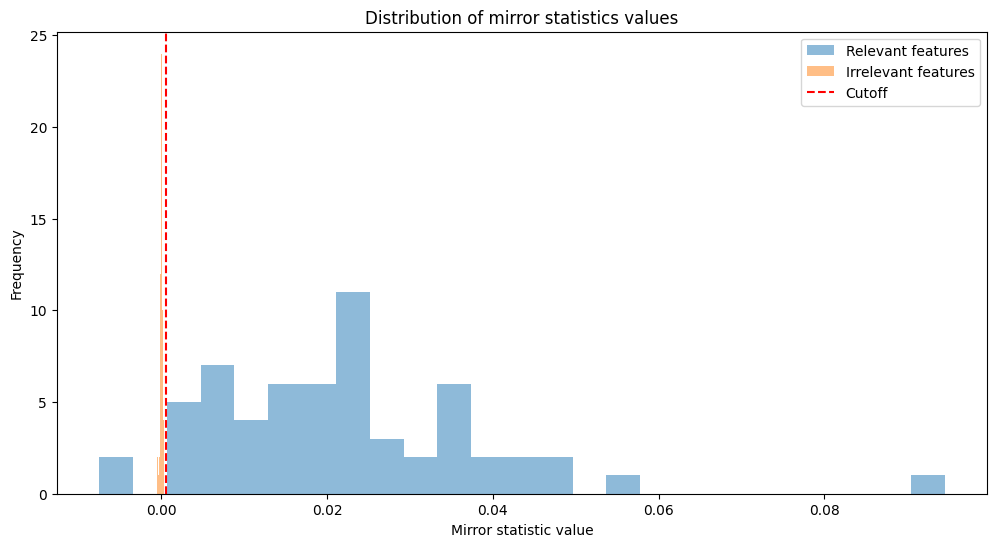

In [55]:
# Frequency scatter plot of values of mirror statistics (dictionary values) for each feature, separating relevant and irrelevant features
# x-axis: mirror statistic value, log-scaled
# y-axis: frequency of this value
# mirror_stats is a dictionary with feature names as keys and mirror statistics values as values
plt.figure(figsize=(12, 6))
plt.hist(np.log1p(list(mirror_stats[feature] for feature in relevant_columns)), bins=25, alpha=0.5, label="Relevant features")
plt.hist(np.log1p(list(mirror_stats[feature] for feature in irrelevant_columns)), bins=25, alpha=0.5, label="Irrelevant features")
plt.axvline(x=np.log1p(cutoff), color='r', linestyle='--', label='Cutoff')

plt.xlabel("Mirror statistic value")
plt.ylabel("Frequency")
plt.title("Distribution of mirror statistics values")
plt.legend()
plt.show()

In [56]:
num_selected_features = len(selected_features)
print(f"Number of selected features: {num_selected_features}")
num_selected_null_features = len([feature for feature in selected_features if feature in irrelevant_columns])
num_selected_relevant_features = len([feature for feature in selected_features if feature in relevant_columns])
power = num_selected_relevant_features / len(relevant_columns)
print(f"Power: {power}")
fdr = num_selected_null_features / num_selected_features
print(f"FDR: {fdr}")


Number of selected features: 59
Power: 0.9666666666666667
FDR: 0.01694915254237288


In [57]:
q=0.2
sorted_mirror_stats = sorted(mirror_stats.items(), key = lambda x: x[1], reverse = False)
cutoff = 0
print(f"Sorted Mirror Stats: {sorted_mirror_stats}")

for feature_name, mirror_stat in sorted_mirror_stats:
    if mirror_stat <= 0:
        continue
    num_j_less = np.sum(m[1] <= -mirror_stat for m in sorted_mirror_stats)
    num_j_more = np.sum(m[1] >= mirror_stat for m in sorted_mirror_stats)
    if num_j_more == 0:
        raise ValueError("No feature is selected.")
    else:
        ratio = (num_j_less + 1) / num_j_more
        if ratio <= q:
            cutoff = mirror_stat
            break

print(f"Cutoff: {cutoff}")

power = len([m for m in sorted_mirror_stats if m[1] >= cutoff and m[0] in relevant_columns]) / len(relevant_columns)
print(f"Power: {power}")
fdr = len([m for m in sorted_mirror_stats if m[1] >= cutoff and m[0] in irrelevant_columns]) / len([m for m in sorted_mirror_stats if m[1] >= cutoff])
print(f"FDR: {fdr}")

Sorted Mirror Stats: [('relevant_walk_44', np.float64(-0.007466040451952772)), ('relevant_walk_53', np.float64(-0.0040282960207914005)), ('noise_67', np.float64(-0.0005678473722621958)), ('noise_54', np.float64(-0.00048327271309304466)), ('noise_74', np.float64(-0.0004569262902023281)), ('noise_90', np.float64(-0.00045131370538753653)), ('noise_60', np.float64(-0.0004106862781194898)), ('noise_91', np.float64(-0.0004085882637116696)), ('noise_0', np.float64(-0.0003824613882934113)), ('noise_55', np.float64(-0.0003739977976298392)), ('noise_73', np.float64(-0.0003647949588052336)), ('noise_44', np.float64(-0.0003599978545009984)), ('noise_19', np.float64(-0.00035294710340055927)), ('noise_87', np.float64(-0.0003509678060890247)), ('noise_53', np.float64(-0.0003100050246705306)), ('noise_136', np.float64(-0.0002891517046252258)), ('noise_6', np.float64(-0.0002568532739841102)), ('noise_58', np.float64(-0.0002446108869276606)), ('noise_30', np.float64(-0.00021443163408737986)), ('noise_12

/var/folders/1_/lwbyjwp1383400_lcrqg_gxw0000gn/T/ipykernel_2698/3826967163.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  num_j_less = np.sum(m[1] <= -mirror_stat for m in sorted_mirror_stats)
/var/folders/1_/lwbyjwp1383400_lcrqg_gxw0000gn/T/ipykernel_2698/3826967163.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  num_j_more = np.sum(m[1] >= mirror_stat for m in sorted_mirror_stats)


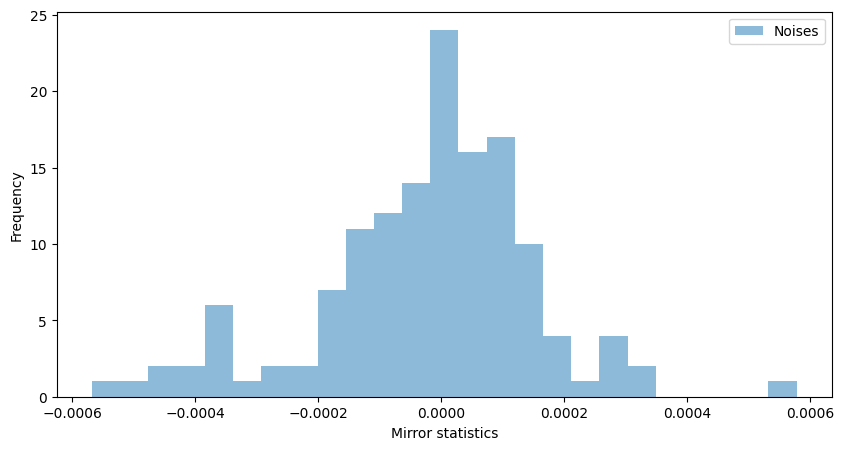

In [58]:
plt.figure(figsize=(10, 5))
plt.hist(list(mirror_stats[feature] for feature in irrelevant_columns), bins=25, alpha=0.5, label="Noises")
#plt.axvline(np.log1p(cutoff), color='red', linestyle='dashed', linewidth=1, label = "Cutoff")

plt.xlabel("Mirror statistics")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [59]:
list(selected_features.keys())

['relevant_walk_56',
 'relevant_walk_9',
 'relevant_walk_35',
 'relevant_walk_38',
 'relevant_walk_42',
 'relevant_walk_23',
 'relevant_walk_28',
 'relevant_walk_20',
 'relevant_walk_22',
 'relevant_walk_12',
 'relevant_walk_6',
 'relevant_walk_1',
 'relevant_walk_19',
 'relevant_walk_31',
 'relevant_walk_52',
 'relevant_walk_37',
 'relevant_walk_2',
 'relevant_walk_5',
 'relevant_walk_24',
 'relevant_walk_51',
 'relevant_walk_47',
 'relevant_walk_10',
 'relevant_walk_29',
 'relevant_walk_55',
 'relevant_walk_17',
 'noise_20',
 'relevant_walk_4',
 'relevant_walk_32',
 'relevant_walk_58',
 'relevant_walk_59',
 'relevant_walk_18',
 'relevant_walk_7',
 'relevant_walk_41',
 'relevant_walk_54',
 'relevant_walk_46',
 'relevant_walk_39',
 'relevant_walk_27',
 'relevant_walk_33',
 'relevant_walk_13',
 'relevant_walk_50',
 'relevant_walk_48',
 'relevant_walk_45',
 'relevant_walk_14',
 'relevant_walk_25',
 'relevant_walk_40',
 'relevant_walk_21',
 'relevant_walk_30',
 'relevant_walk_8',
 'releva

In [60]:
'''
scaler1 = MinMaxScaler()
new_train_data_df = train_data_df[list(selected_features.keys())]
new_test_data_df = test_data_df[list(selected_features.keys())]
train_labels = scaler1.fit_transform(train_labels.reshape(-1, 1)).flatten().astype(np.float64)
test_labels = scaler1.transform(test_labels.reshape(-1, 1)).flatten().astype(np.float64)
new_train_data_lstm, train_labels_lstm, new_test_data_lstm, test_labels_lstm, scaler = prepare_lstm_data(new_train_data_df, train_labels,
                                                                                new_test_data_df, test_labels, scaler1, lookback=30)

model_new, optimizer_new = train_lstm_model(new_train_data_lstm, train_labels_lstm, new_test_data_lstm, test_labels_lstm, num_epochs=100)
'''

'\nscaler1 = MinMaxScaler()\nnew_train_data_df = train_data_df[list(selected_features.keys())]\nnew_test_data_df = test_data_df[list(selected_features.keys())]\ntrain_labels = scaler1.fit_transform(train_labels.reshape(-1, 1)).flatten().astype(np.float64)\ntest_labels = scaler1.transform(test_labels.reshape(-1, 1)).flatten().astype(np.float64)\nnew_train_data_lstm, train_labels_lstm, new_test_data_lstm, test_labels_lstm, scaler = prepare_lstm_data(new_train_data_df, train_labels,\n                                                                                new_test_data_df, test_labels, scaler1, lookback=30)\n\nmodel_new, optimizer_new = train_lstm_model(new_train_data_lstm, train_labels_lstm, new_test_data_lstm, test_labels_lstm, num_epochs=100)\n'

In [61]:
'''
train_score, test_score = train_and_test_score(model_new, scaler1, new_train_data_lstm, train_labels_lstm, new_test_data_lstm, test_labels_lstm)
print(f"Train score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")\
'''

'\ntrain_score, test_score = train_and_test_score(model_new, scaler1, new_train_data_lstm, train_labels_lstm, new_test_data_lstm, test_labels_lstm)\nprint(f"Train score: {train_score:.4f}")\nprint(f"Test score: {test_score:.4f}")'